In [14]:
#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
import sqlalchemy as db
import matplotlib.pyplot as plot
import pandas as pd
from sqlalchemy.orm import sessionmaker
print('done')



done


In [15]:
# Creating a Engine object which is our handle into the database.
engine = create_engine('sqlite:///world.sqlite')
# Connecting to the database
conn = engine.connect()


# Read the metadata from the existing database.
#  Since the database already exists and has tables defined, we can create Python objects based on these automatically.
DBInfo=MetaData(engine)

In [16]:
# Auto-creating the country object basedon the metadata read into the DBInfo.
country1=Table('country', DBInfo, autoload=True)

**Solution to question 4:**

In [17]:
#extracting life expectancy and population and creating a dataframe

# CREATE A SESSION OBJECT TO INITIATE QUERY IN DATABASE
Session = sessionmaker(bind = engine)
session =Session()
# SQLAlCHEMY ORM QUERY TO FETCH ALL RECORDS
df = pd.read_sql_query(
    sql = session.query(country1.c.LifeExpectancy,
                        country1.c.Population).statement,
    con = engine
)
 
df

,LifeExpectancy,Population
0,78.4,103000
1,45.9,22720000
2,38.3,12878000
3,76.1,8000
4,71.6,3401200
...,...,...
235,72.4,10640000
236,51.1,40377000
237,37.2,9169000
238,37.8,11669000


**Counting the no of rows in country table to double check if the above command extracted all the rows**

In [18]:
result = db.select([db.func.count()]).select_from(country1).scalar()
 
print("Count:", result)

Count: 240


**Plotting a bar graph for Population vs LifeExpectancy to analyze if highly populated countries have low life expectancy**

<AxesSubplot:xlabel='Population'>

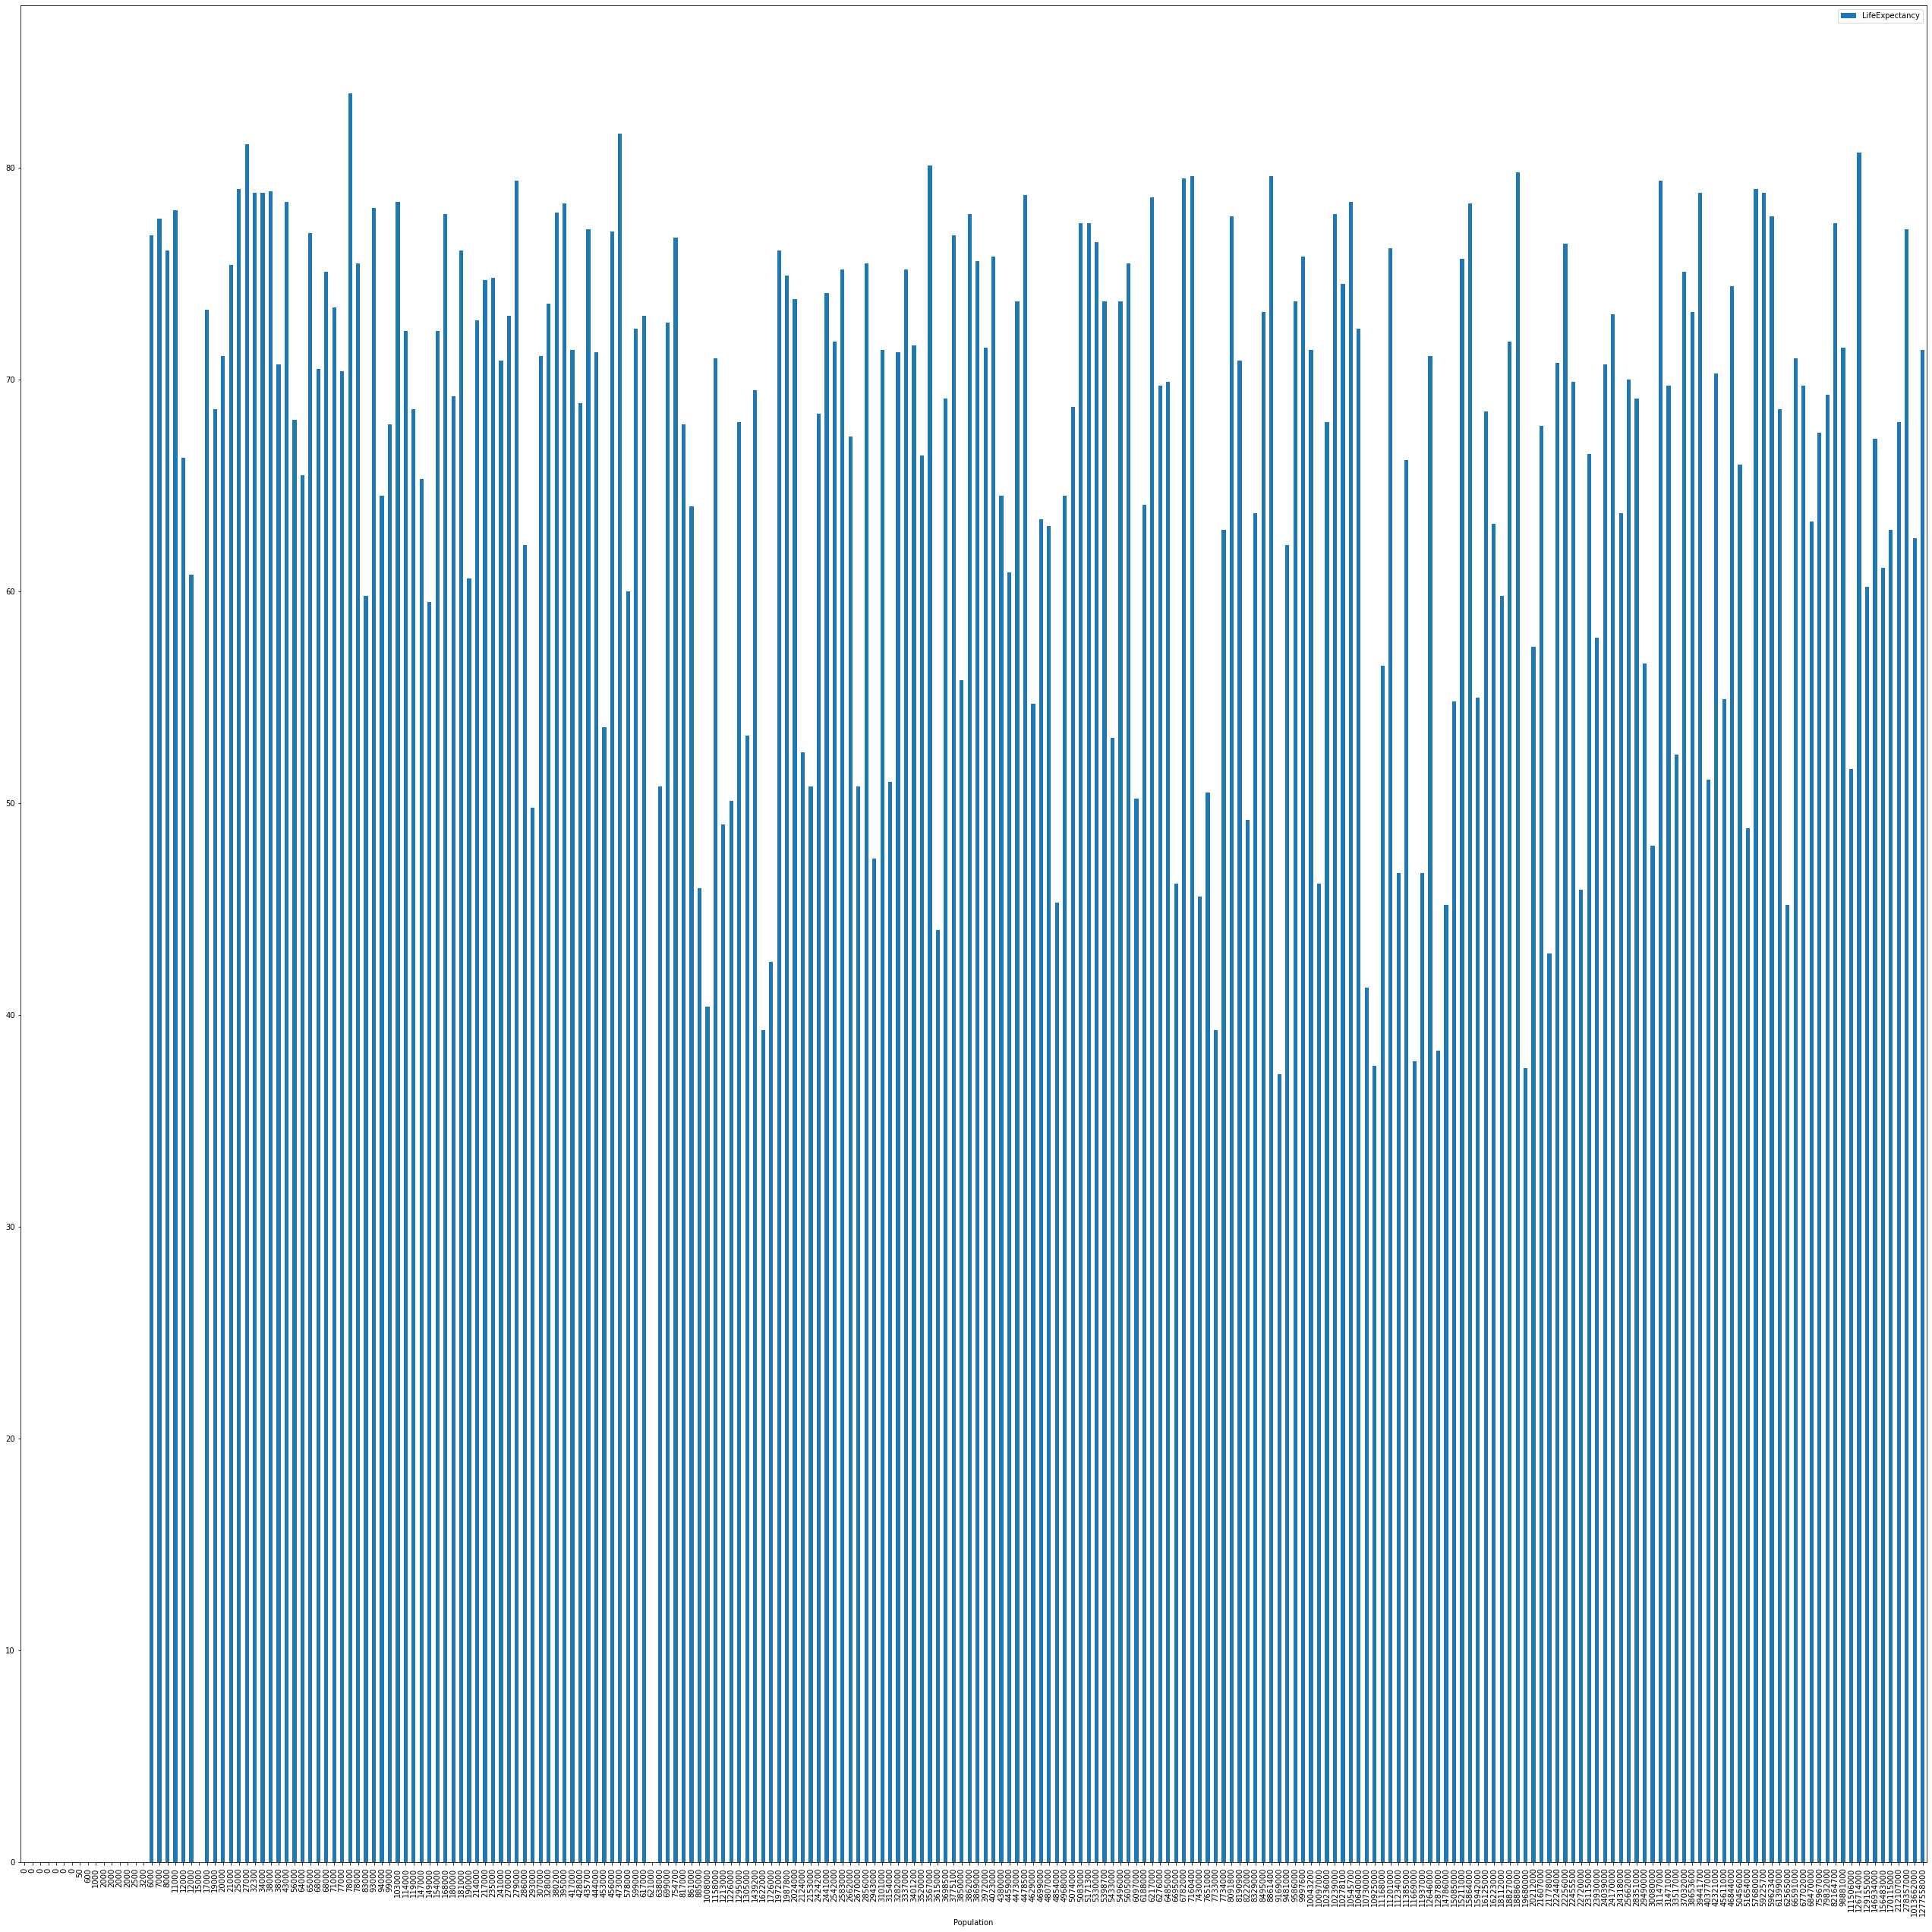

In [19]:
df1=df.sort_values(by=['Population']) ##Sorting values based on population in ascending order
df1.plot(x="Population", y="LifeExpectancy", kind="bar",figsize=[45,45])
 